In [36]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

# Gather Data

In [2]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [ ]:
# Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [4]:
# No Null, No Strings wow"

In [5]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,0.730631,1.945368,-0.337243,5.549368,0.320715,-0.320715,2.391190e+04,130.789186,-130.789186,121.194193,19.483454,-40.352509,1095.152768,8.263769e+03,3.599918e+03,-4.302621e+03,276.038764,1.233729,5700.682449,143.898155,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,3.346956,9.401850,1.349036,6.425205,0.665352,0.665352,8.241240e+04,4689.233030,4689.233030,3519.737626,436.752064,1366.939375,856.234809,1.775255e+05,5.607270e+04,9.924848e+04,824.788481,0.650089,802.060405,46.566511,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,0.000000,-20.200000,7.500000e+00,0.000000,-388600.000000,0.140000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,1.600000,1.000000,2661.000000,0.000000,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,0.198000,0.039900,-0.446000,2.446000,0.048900,-0.334000,1.604000e+02,9.400000,-48.000000,1.400000,0.240000,-2.080000,554.000000,2.227000e+01,1.139000e+01,-3.068950e+02,12.400000,1.000000,5297.000000,105.000000,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,0.539000,0.189800,-0.204000,3.793000,0.137000,-0.137000,4.245000e+02,20.200000,-20.200000,2.420000,0.520000,-0.310000,888.000000,1.466700e+02,8.090000e+01,-4.443000e+01,23.700000,1.000000,5757.000000,156.000000,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,0.891000,0.379000,-0.044000,6.197500,0.334000,-0.048900,1.533250e+03,48.000000,-9.400000,15.965000,2.650000,-0.140000,1397.500000,9.006700e+02,5.529550e+02,-6.400000e+00,82.250000,1.000000,6110.000000,174.000000,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


In [6]:
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [7]:
df.groupby("koi_disposition").size()

koi_disposition
CANDIDATE         1687
CONFIRMED         1800
FALSE POSITIVE    3504
dtype: int64

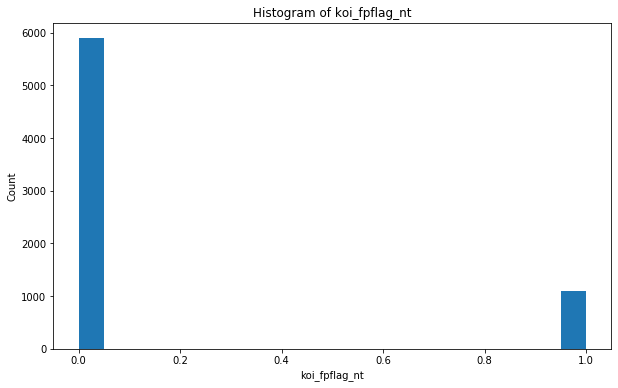

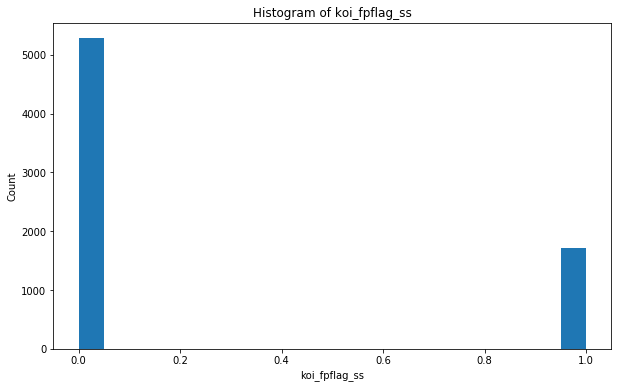

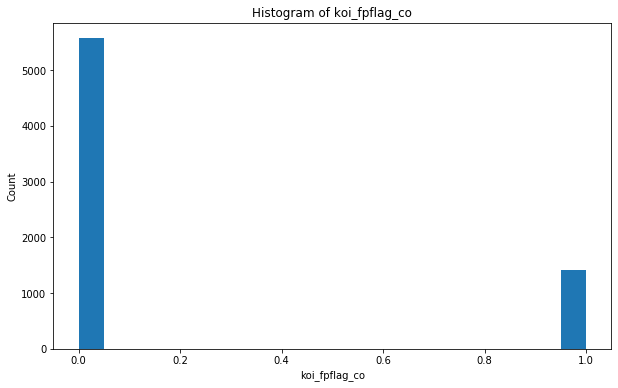

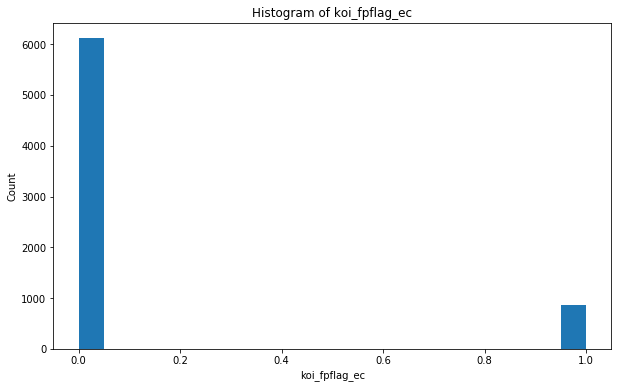

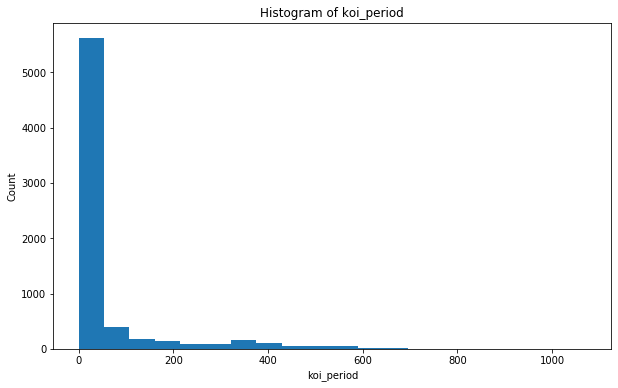

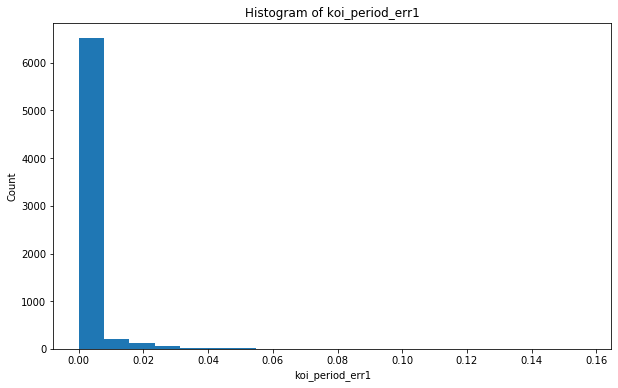

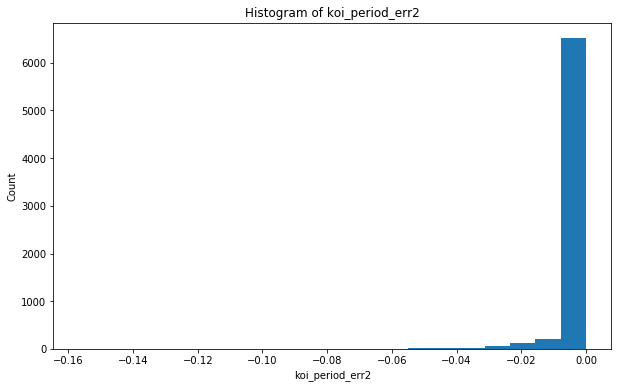

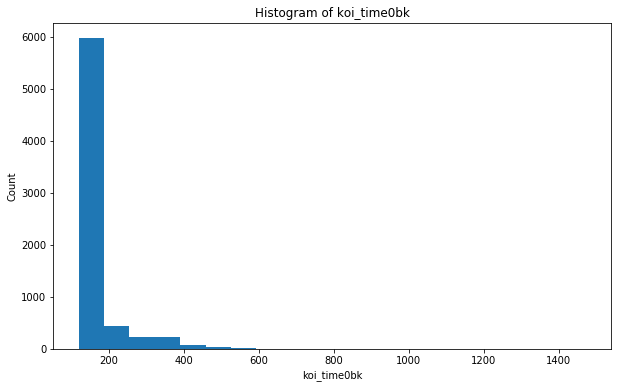

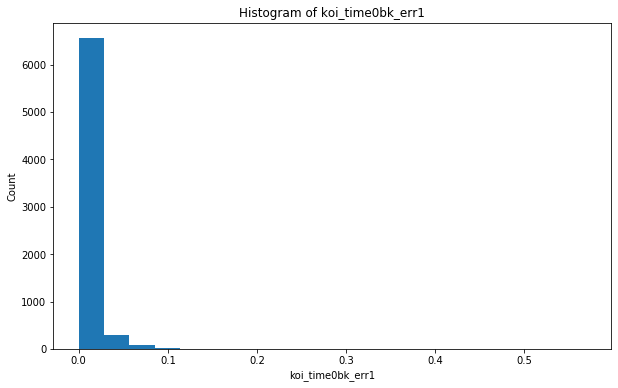

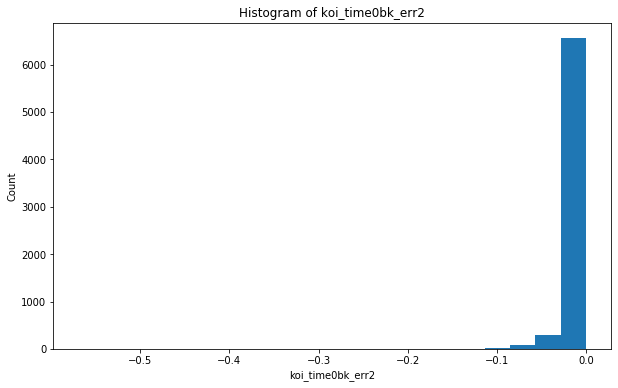

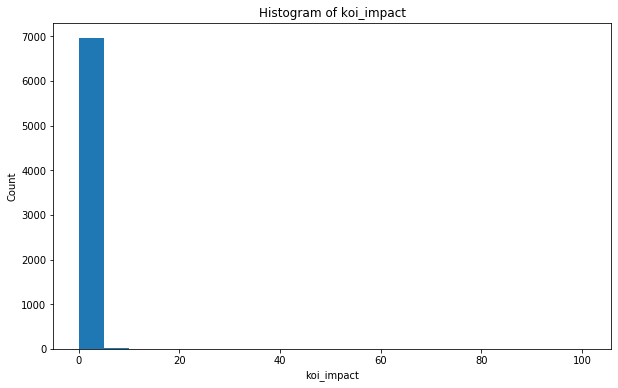

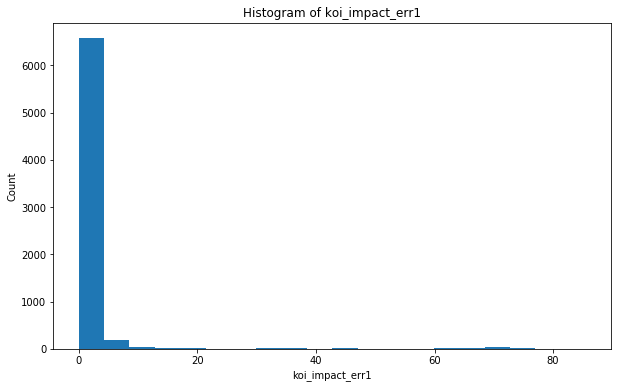

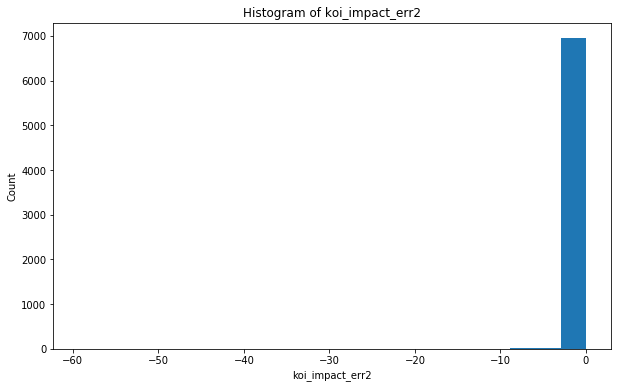

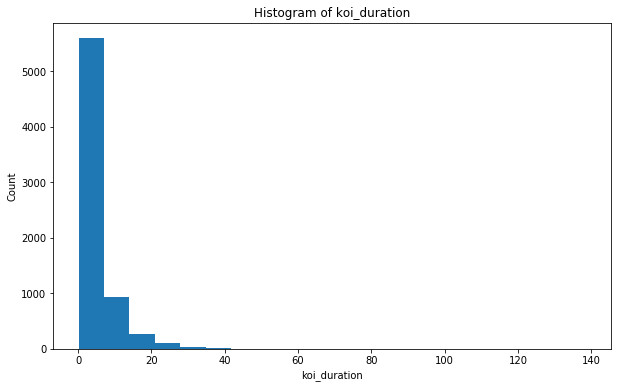

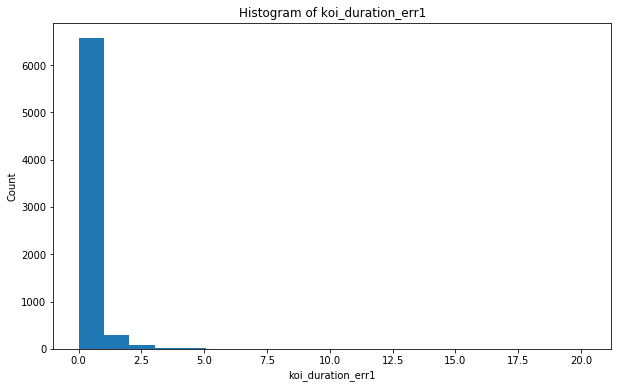

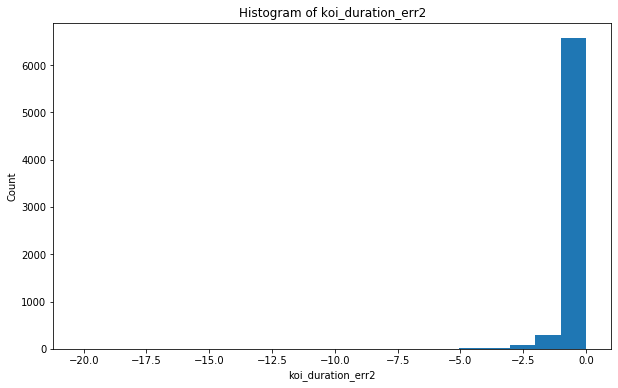

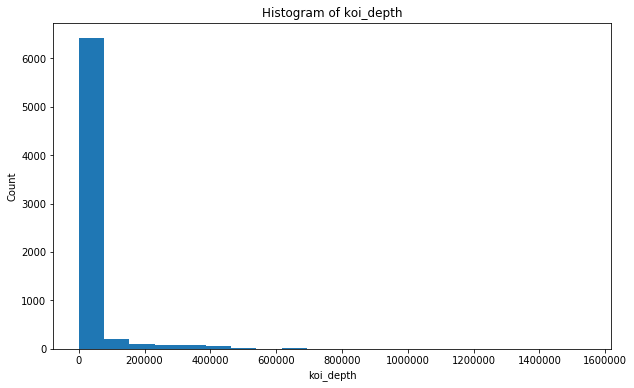

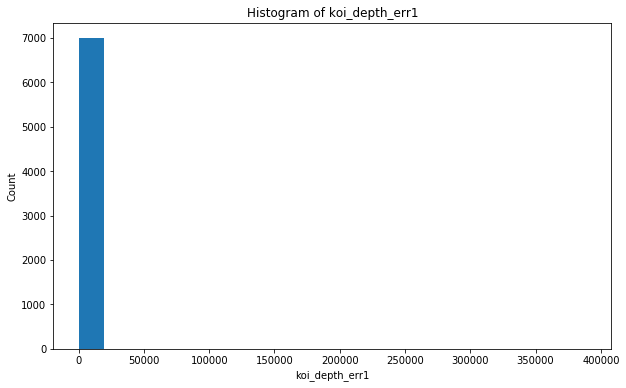

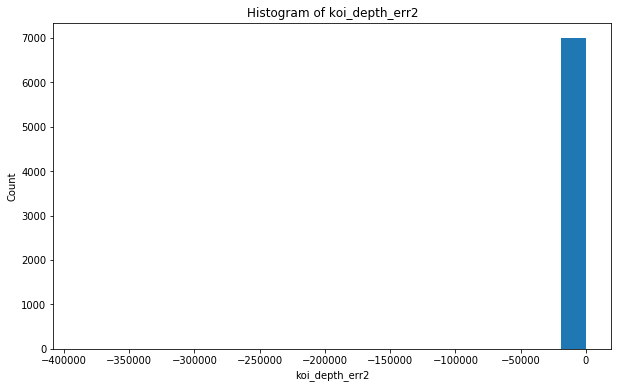

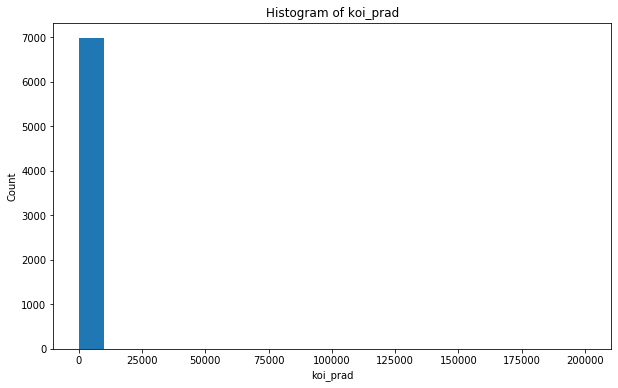

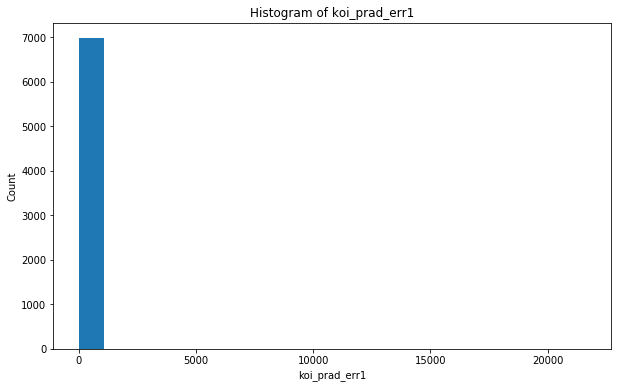

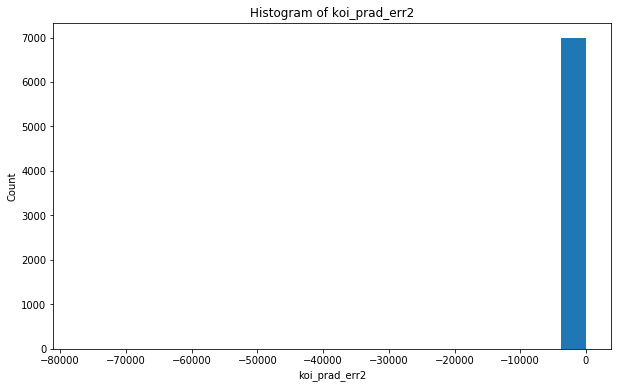

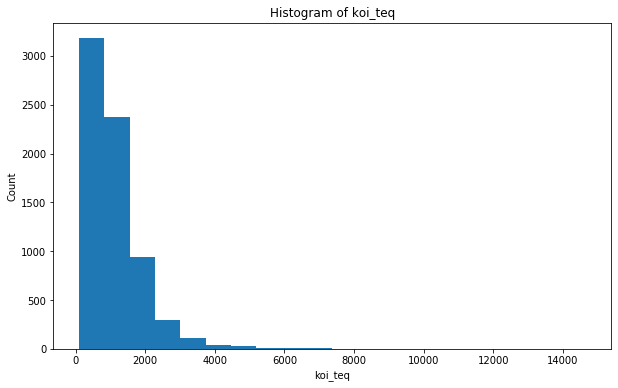

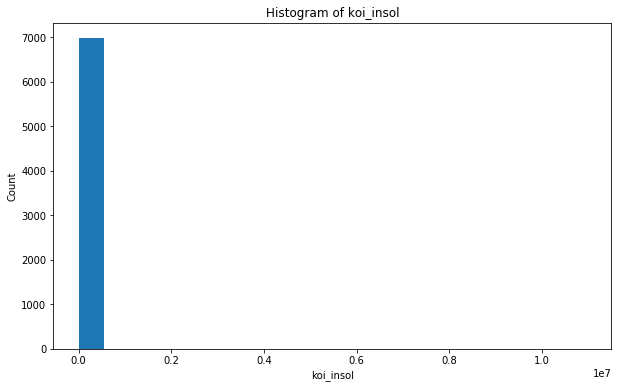

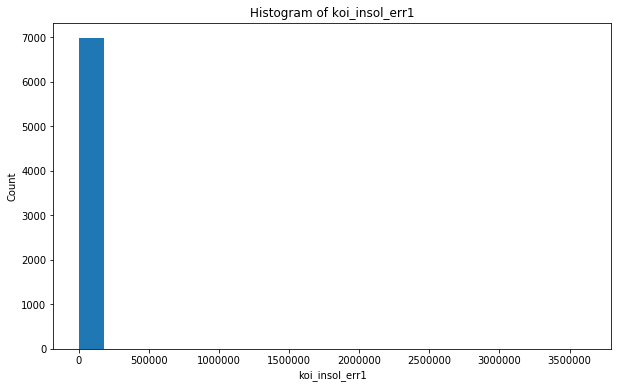

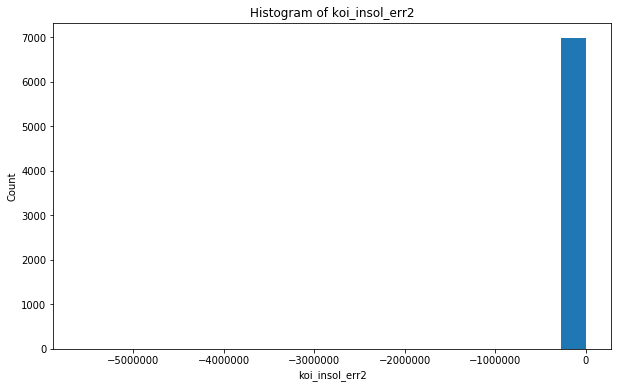

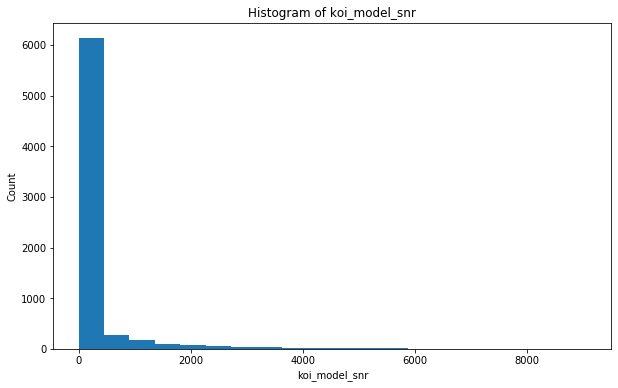

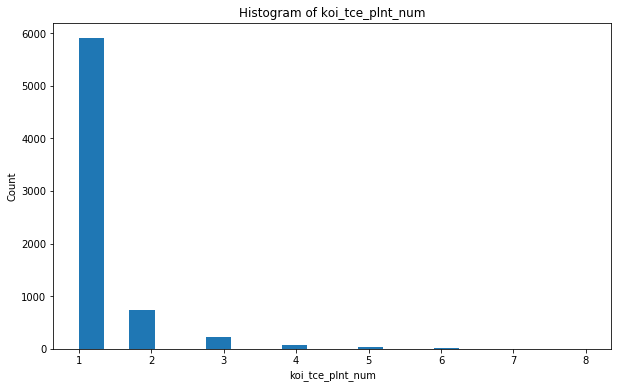

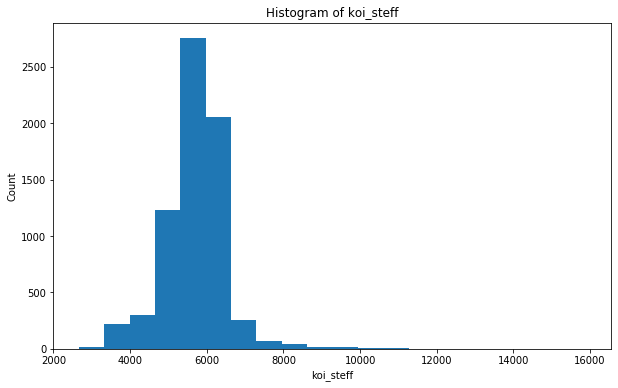

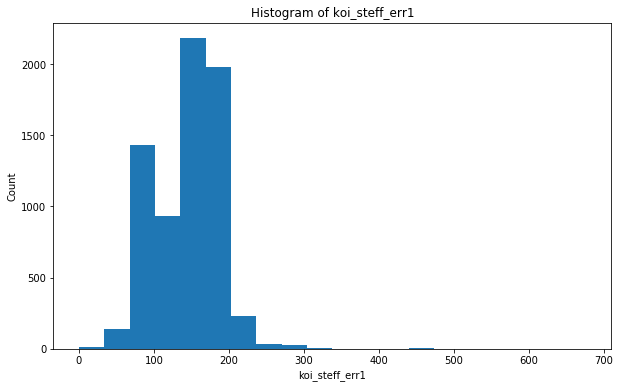

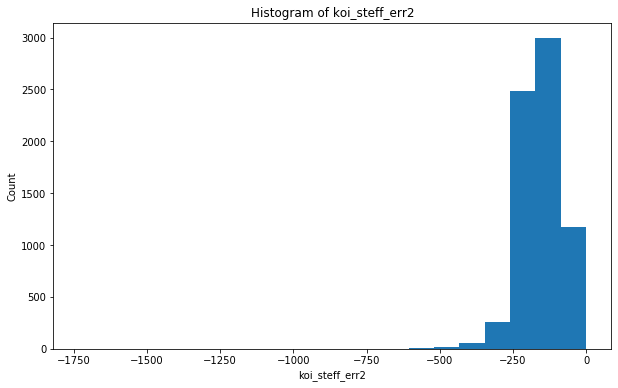

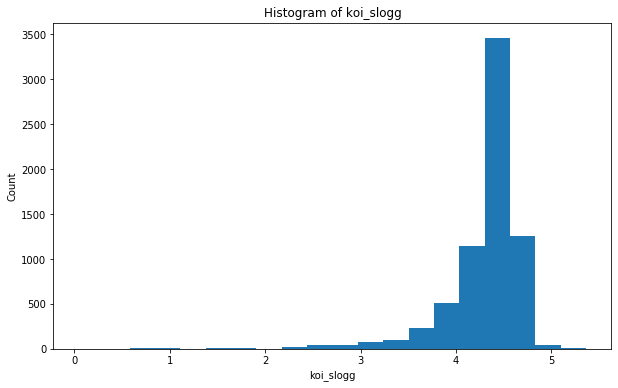

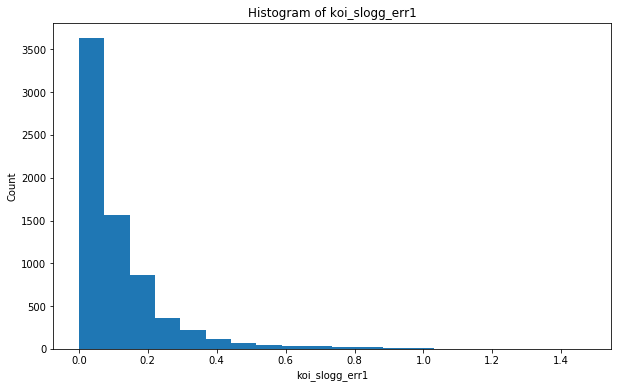

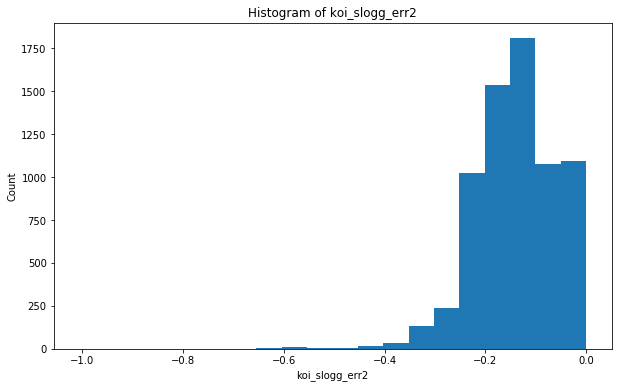

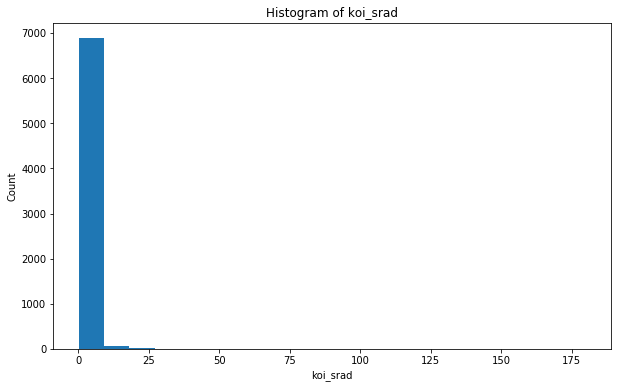

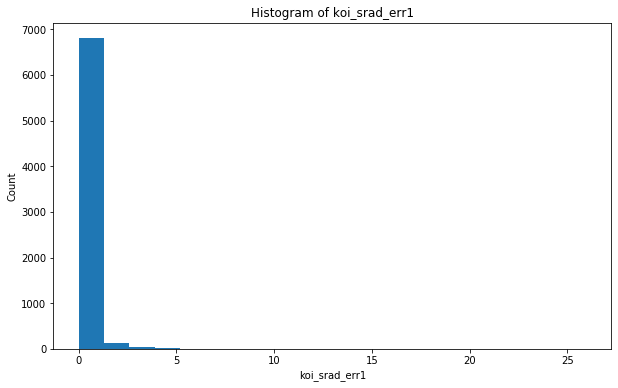

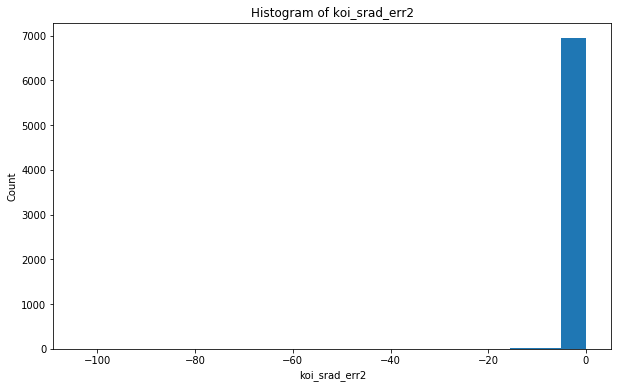

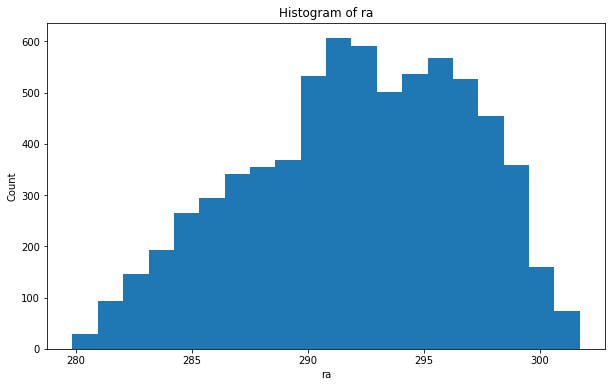

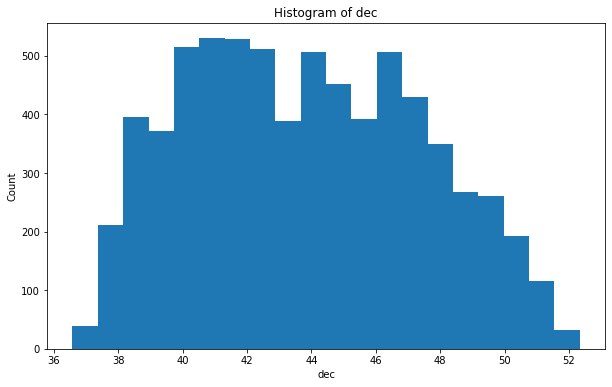

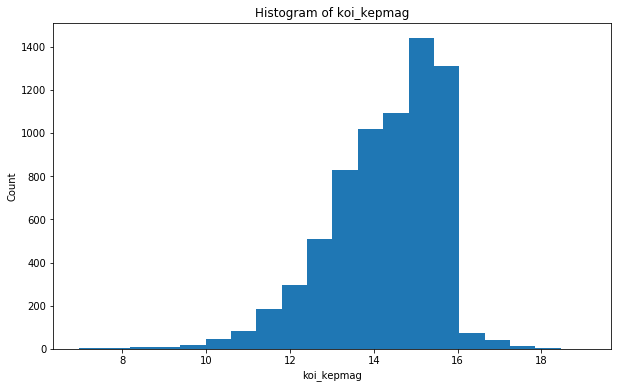

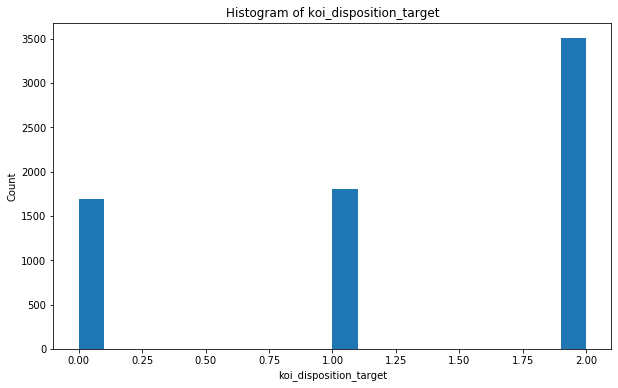

In [35]:
for col in df.columns:
    if type(df[col][0]) != str:
        plt.figure(figsize=(10,6))
        plt.hist(df[col], bins=20)
        plt.title(f"Histogram of {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.show()

In [8]:
target_labels = []

# LABEL ENCODE
for indx, row in df.iterrows():
    if row["koi_disposition"] ==  "CANDIDATE":
        target_labels.append(0)
    elif row["koi_disposition"] ==  "CONFIRMED":
        target_labels.append(1)
    else:
        target_labels.append(2)

df["koi_disposition_target"] = target_labels

In [9]:
df_sub = df.drop("koi_disposition", axis=1)

# Correlations

In [10]:
df_sub.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_target
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,0.072748,-0.012333,-0.059048,0.287118,0.337558,-0.337558,-0.043942,0.031922,-0.031922,0.054410,0.061662,-0.051273,-0.003013,-0.000566,0.017538,-0.002140,-0.079241,0.035902,0.105008,0.129444,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643,0.380710
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,0.042021,0.130379,0.054633,0.014224,-0.181716,0.181716,0.423883,0.003900,-0.003900,-0.000752,0.004241,0.003393,0.191842,0.031315,0.030962,-0.023719,0.439764,-0.184721,0.104600,0.222332,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009,0.486481
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,0.007501,0.097642,0.002609,-0.048398,-0.004961,0.004961,-0.132939,-0.011108,0.011108,-0.013284,-0.015563,0.012901,0.259045,0.018086,0.016958,-0.011543,-0.134479,-0.122911,0.016750,0.159761,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023,0.452002
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,-0.004913,0.030568,0.011326,0.023232,0.025359,-0.025359,-0.088001,-0.003062,0.003062,-0.011078,-0.013318,0.009913,0.218624,0.034874,0.045647,-0.028259,-0.091905,-0.103976,0.012411,0.120078,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932,0.339983
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,0.067571,0.012136,-0.074607,0.324488,0.373670,-0.373670,-0.064272,0.038614,-0.038614,0.072790,0.052353,-0.070736,-0.390006,-0.021743,-0.029905,0.020268,-0.081456,-0.022590,0.021806,0.036838,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959,0.023592
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,0.028068,-0.004699,-0.039732,0.268469,0.529821,-0.529821,-0.069138,0.009823,-0.009823,0.030522,0.021726,-0.030554,-0.229438,-0.011772,-0.016157,0.010945,-0.082299,0.021398,0.032776,0.078357,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097,0.047197
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,-0.028068,0.004699,0.039732,-0.268469,-0.529821,0.529821,0.069138,-0.009823,0.009823,-0.030522,-0.021726,0.030554,0.229438,0.011772,0.016157,-0.010945,0.082299,-0.021398,-0.032776,-0.078357,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097,-0.047197
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,0.055597,0.044399,-0.065649,0.200979,0.228485,-0.228485,-0.037195,0.055597,-0.055597,0.039814,0.041496,-0.037977,-0.315510,-0.021307,-0.028232,0.020156,-0.058522,-0.006344,0.003641,0.039981,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898,-0.009463
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,0.023150,-0.015680,-0.035277,0.199305,0.519143,-0.519143,-0.110431,0.015094,-0.015094,0.014575,0.031086,-0.013119,-0.

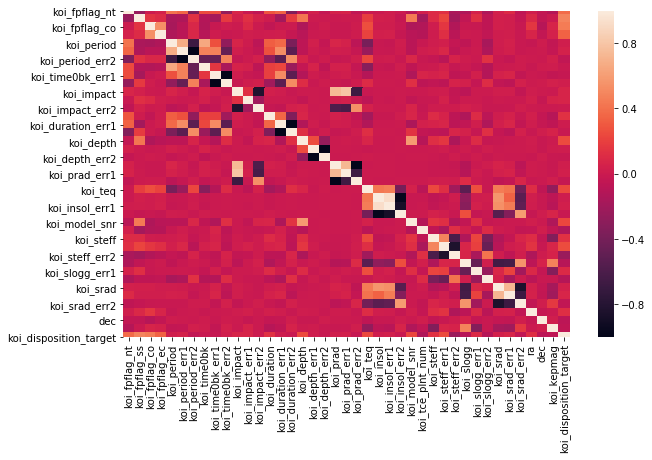

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub.corr())
plt.show()

# Machine Learning

In [52]:
abs(df_sub.corr()["koi_disposition_target"]).sort_values(ascending=False)

koi_disposition_target    1.000000
koi_fpflag_ss             0.486481
koi_fpflag_co             0.452002
koi_fpflag_nt             0.380710
koi_fpflag_ec             0.339983
koi_steff_err1            0.254084
koi_depth                 0.244109
koi_teq                   0.237782
koi_model_snr             0.233840
koi_steff_err2            0.232041
koi_tce_plnt_num          0.135711
koi_duration              0.134811
koi_steff                 0.133363
ra                        0.117899
koi_slogg_err2            0.104482
koi_slogg                 0.101181
koi_slogg_err1            0.099996
koi_srad_err1             0.077580
dec                       0.072855
koi_impact                0.067744
koi_impact_err1           0.065843
koi_kepmag                0.054859
koi_srad_err2             0.053862
koi_period_err1           0.047197
koi_period_err2           0.047197
koi_srad                  0.045170
koi_prad_err1             0.035515
koi_insol_err1            0.031934
koi_time0bk_err2    

In [53]:
abs(df_sub.corr()["koi_disposition_target"]).sort_values(ascending=False).index

Index(['koi_disposition_target', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_nt', 'koi_fpflag_ec', 'koi_steff_err1', 'koi_depth',
       'koi_teq', 'koi_model_snr', 'koi_steff_err2', 'koi_tce_plnt_num',
       'koi_duration', 'koi_steff', 'ra', 'koi_slogg_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_srad_err1', 'dec', 'koi_impact',
       'koi_impact_err1', 'koi_kepmag', 'koi_srad_err2', 'koi_period_err1',
       'koi_period_err2', 'koi_srad', 'koi_prad_err1', 'koi_insol_err1',
       'koi_time0bk_err2', 'koi_time0bk_err1', 'koi_prad', 'koi_prad_err2',
       'koi_period', 'koi_insol', 'koi_depth_err2', 'koi_depth_err1',
       'koi_duration_err2', 'koi_duration_err1', 'koi_insol_err2',
       'koi_time0bk', 'koi_impact_err2'],
      dtype='object')

In [54]:
# get pandas columns for prediction
target = df_sub["koi_disposition_target"]
# features = df_sub.drop(["koi_disposition_target"], axis=1)
features = df_sub.loc[:, ['koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_nt', 'koi_fpflag_ec', 'koi_steff_err1', 'koi_depth',
       'koi_teq', 'koi_model_snr', 'koi_steff_err2', 'koi_tce_plnt_num',
       'koi_duration', 'koi_steff', 'ra', 'koi_slogg_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_srad_err1', 'dec', 'koi_impact',
       'koi_impact_err1', 'koi_kepmag', 'koi_srad_err2']]

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# Scale the X
x_scaler = StandardScaler()
x_scaler.fit(X)
X_scale = x_scaler.transform(X)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# NO ROC CURVES FOR > 2 CLASSES

Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.69      0.60      0.64      1349
           1       0.67      0.72      0.69      1440
           2       0.98      1.00      0.99      2803

    accuracy                           0.83      5592
   macro avg       0.78      0.77      0.78      5592
weighted avg       0.83      0.83      0.83      5592


Confusion Matrix - In Sample
[[ 812  517   20]
 [ 365 1041   34]
 [   5    0 2798]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       338
           1       0.66      0.71      0.69       360
           2       0.98      1.00      0.99       701

    accuracy                           0.83      1399
   macro avg       0.78      0.77      0.77      1399
weighted avg       0.83      0.83      0.83      1399


Confusion Matrix - Out Sample
[[208 128   2]
 [ 96 255   9]


C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
# train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1440
           2       1.00      1.00      1.00      2803

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1349    0    0]
 [   0 1440    0]
 [   0    0 2803]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       338
           1       0.72      0.71      0.71       360
           2       0.98      0.98      0.98       701

    accuracy                           0.84      1399
   macro avg       0.80      0.80      0.80      1399
weighted avg       0.85      0.84      0.85      1399


Confusion Matrix - Out Sample
[[242  92   4]
 [ 96 255 

In [57]:
# train the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1440
           2       1.00      1.00      1.00      2803

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1349    0    0]
 [   0 1440    0]
 [   0    0 2803]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       338
           1       0.80      0.83      0.82       360
           2       0.98      1.00      0.99       701

    accuracy                           0.90      1399
   macro avg       0.87      0.87      0.87      1399
weighted avg       0.90      0.90      0.90      1399


Confusion Matrix - Out Sample
[[259  74   5]
 [ 51 299 

In [58]:
# train the model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1349
           1       0.65      0.82      0.72      1440
           2       0.99      0.93      0.96      2803

    accuracy                           0.83      5592
   macro avg       0.80      0.80      0.80      5592
weighted avg       0.85      0.83      0.84      5592


Confusion Matrix - In Sample
[[ 881  451   17]
 [ 253 1176   11]
 [   6  194 2603]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       338
           1       0.64      0.82      0.72       360
           2       0.99      0.90      0.95       701

    accuracy                           0.83      1399
   macro avg       0.81      0.81      0.80      1399
weighted avg       0.85      0.83      0.84      1399


Confusion Matrix - Out Sample
[[237  99   2]
 [ 63 295   2]

In [59]:
 # train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1349
           1       0.85      0.89      0.87      1440
           2       0.98      1.00      0.99      2803

    accuracy                           0.93      5592
   macro avg       0.91      0.90      0.90      5592
weighted avg       0.93      0.93      0.93      5592


Confusion Matrix - In Sample
[[1097  232   20]
 [ 130 1285   25]
 [   4    0 2799]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       338
           1       0.81      0.85      0.83       360
           2       0.98      1.00      0.99       701

    accuracy                           0.91      1399
   macro avg       0.88      0.88      0.88      1399
weighted avg       0.91      0.91      0.91      1399


Confusion Matrix - Out Sample
[[265  71   2]
 [ 44 3

In [60]:
# train the model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1440
           2       1.00      1.00      1.00      2803

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1349    0    0]
 [   0 1440    0]
 [   0    0 2803]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       338
           1       0.83      0.84      0.84       360
           2       0.98      1.00      0.99       701

    accuracy                           0.91      1399
   macro avg       0.89      0.89      0.89      1399
weighted avg       0.91      0.91      0.91      1399


Confusion Matrix - Out Sample
[[276  60   2]
 [ 48 303   9]


In [61]:
# train the model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

#get predictions
in_sample_preds = knn.predict(X_train)
out_sample_preds = knn.predict(X_test)

# get evaluation report
print("KNN Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

KNN Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      1349
           1       0.67      0.79      0.72      1440
           2       0.98      0.99      0.98      2803

    accuracy                           0.84      5592
   macro avg       0.79      0.78      0.78      5592
weighted avg       0.84      0.84      0.83      5592


Confusion Matrix - In Sample
[[ 775  537   37]
 [ 274 1135   31]
 [  14   21 2768]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       338
           1       0.62      0.74      0.68       360
           2       0.98      0.98      0.98       701

    accuracy                           0.81      1399
   macro avg       0.76      0.75      0.75      1399
weighted avg       0.81      0.81      0.81      1399


Confusion Matrix - Out Sample
[[179 154   5]
 [ 85 268   7]
 [  6

In [ ]:
# SVM doesn't work